Practical No-2 **Track experiments using MLflow or Weights & Biases** **bold text**

Install Mlflow

In [1]:
!pip install mlflow


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.7/24.7 MB 54.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 85.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.0/247.0 kB 21.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 16.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 680.6/680.6 kB 56.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.4/203.4 kB 19.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.6/65.6 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 120.0/120.0 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.6/201.6 kB 20.9 MB/s eta 0:00:00


# Create a Simple ML Script

In [2]:
import mlflow
import mlflow.sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

# Generate dummy regression data
X, y = make_regression(n_samples=100, n_features=1, noise=0.1)
X_train, X_test, y_train, y_test = train_test_split(X, y)

# Start MLflow run
with mlflow.start_run():
    model = LinearRegression()
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)

    # Log model parameters
    mlflow.log_param("model_type", "LinearRegression")

    # Log performance
    mse = mean_squared_error(y_test, predictions)
    mlflow.log_metric("mse", mse)

    # Log the model
    mlflow.sklearn.log_model(model, "model")


2025/08/04 05:03:53 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/08/04 05:03:58 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


# Import Libraries and Write the Experiment Code

In [5]:
import mlflow
import mlflow.sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
import pandas as pd

# Generate dummy regression data
X, y = make_regression(n_samples=100, n_features=1, noise=0.1)
X_train, X_test, y_train, y_test = train_test_split(X, y)

# Start MLflow tracking
with mlflow.start_run():
    model = LinearRegression()
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)

    # Log model parameters
    mlflow.log_param("model_type", "LinearRegression")

    # Log performance
    mse = mean_squared_error(y_test, predictions)
    mlflow.log_metric("mse", mse)

    # Log the model with input example
    input_example = pd.DataFrame(X_test[:5])
    mlflow.sklearn.log_model(model, name="model", input_example=input_example)


# Launch the MLflow Tracking UI

---



# Install and set up ngrok

In [6]:
!pip install pyngrok


# Set up and run MLflow UI

In [9]:
from pyngrok import ngrok

# Replace YOUR_TOKEN_HERE with your actual token from Ngrok dashboard
!ngrok config add-authtoken 30oDCENoR3P5GIwBFHyS870HAoQ_86gmfWCoyoNjXpoBSzvfr


Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


# Set up and run MLflow UI

In [10]:
# Start MLflow UI
mlflow_port = 5000
get_ipython().system_raw(f"mlflow ui --port {mlflow_port} &")

# Expose MLflow UI using ngrok
public_url = ngrok.connect(mlflow_port)
print(f"MLflow Tracking UI is available at: {public_url}")


MLflow Tracking UI is available at: NgrokTunnel: "https://43e2a260de0f.ngrok-free.app" -> "http://localhost:5000"


# Compare Two Models in MLflow(Linear Regression

Decision Tree Regressor)

In [11]:
import mlflow
import mlflow.sklearn
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import pandas as pd

# Generate data
X, y = make_regression(n_samples=200, n_features=1, noise=10)
X_train, X_test, y_train, y_test = train_test_split(X, y)

# Function to train and log model
def train_and_log_model(model, model_name):
    with mlflow.start_run():
        model.fit(X_train, y_train)
        preds = model.predict(X_test)
        mse = mean_squared_error(y_test, preds)

        # Log model type and metric
        mlflow.log_param("model_type", model_name)
        mlflow.log_metric("mse", mse)

        # Log the model
        input_example = pd.DataFrame(X_test[:5])
        mlflow.sklearn.log_model(model, name="model", input_example=input_example)

        print(f"{model_name} - MSE: {mse:.2f}")

# Train and log both models
train_and_log_model(LinearRegression(), "LinearRegression")
train_and_log_model(DecisionTreeRegressor(max_depth=5), "DecisionTree")


LinearRegression - MSE: 102.88
DecisionTree - MSE: 197.39


# Log Visualizations to MLflow (e.g., prediction vs. actual plot)

LinearRegression - MSE: 102.88 - Plot logged
DecisionTree - MSE: 197.39 - Plot logged


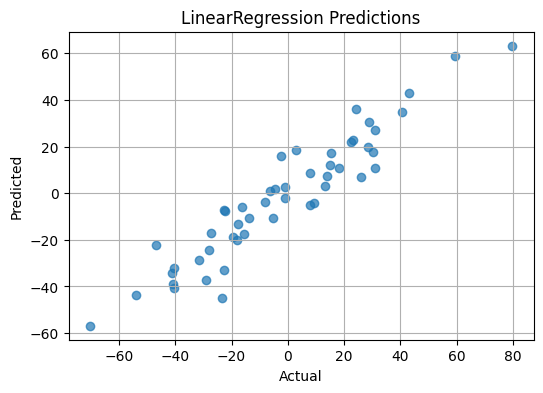

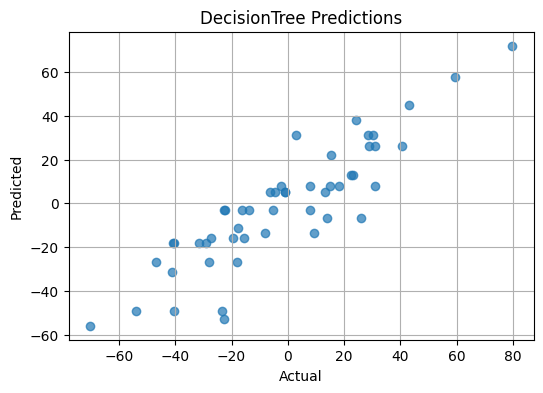

In [12]:
import matplotlib.pyplot as plt
import tempfile
import os

def train_and_log_with_plot(model, model_name):
    with mlflow.start_run():
        model.fit(X_train, y_train)
        preds = model.predict(X_test)
        mse = mean_squared_error(y_test, preds)

        mlflow.log_param("model_type", model_name)
        mlflow.log_metric("mse", mse)

        input_example = pd.DataFrame(X_test[:5])
        mlflow.sklearn.log_model(model, name="model", input_example=input_example)

        # === Create prediction vs actual plot ===
        plt.figure(figsize=(6, 4))
        plt.scatter(y_test, preds, alpha=0.7)
        plt.xlabel("Actual")
        plt.ylabel("Predicted")
        plt.title(f"{model_name} Predictions")
        plt.grid(True)

        # === Save and log plot as artifact ===
        tmpdir = tempfile.mkdtemp()
        plot_path = os.path.join(tmpdir, f"{model_name}_plot.png")
        plt.savefig(plot_path)
        mlflow.log_artifact(plot_path)

        print(f"{model_name} - MSE: {mse:.2f} - Plot logged")

# Try with both models
train_and_log_with_plot(LinearRegression(), "LinearRegression")
train_and_log_with_plot(DecisionTreeRegressor(max_depth=5), "DecisionTree")
